In [7]:
import numpy as np
import matplotlib.pyplot as plt
import csv

In [8]:
file_name = './dataset/train_2v.csv'

heart_disease = []
hypertension = []
age = []
avg_gluocose_level = []
stroke = []

In [9]:
with open(file_name, 'r') as csvFile:
    reader = csv.reader(csvFile)
    next(reader)
    for row in reader:
        heart_disease.append(int(row[4]))
        hypertension.append(int(row[3]))
        age.append(float(row[2]))
        avg_gluocose_level.append(float(row[8]))
        stroke.append(int(row[11]))

In [10]:
chads2_score = []

for i, item in enumerate(heart_disease):
    #print (i,item)
    c_score = heart_disease[i]
    h_score = hypertension[i]
    
    if age[i]<75:
        a_score = 0
    else:
        a_score = 1
        
    if avg_gluocose_level[i]<200:
        d_score = 0
    else:
        d_score = 1
        
    if stroke[i]==0:
        s2_score = 0
    else:
        s2_score = 2
        
        
    total_score = c_score + h_score + a_score + d_score + s2_score
    chads2_score.append(int(total_score))
        
print ('chads2_score calculation complete')

chads2_score calculation complete


In [14]:
chads2_score = np.array(chads2_score)
stroke_flg = np.array(stroke)  # 1 if stroke else 0 

def get_chads2_stroke_event_proportion(chads2_score: np.ndarray) -> list:
    values = []
    for i in range(7):
        values.append(np.sum(np.array(chads2_score[stroke_flg==1]) == i) / \
            np.sum(np.array(chads2_score) == i))
    return values

<ipython-input-18-731dfd5330be>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labelList)


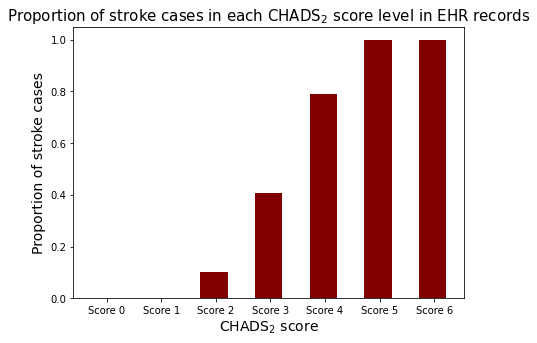

In [18]:
fig, ax = plt.subplots(1, figsize=(7,5))
 
courses = list([i for i in range(7)])
values = get_chads2_stroke_event_proportion(chads2_score)

# creating the bar plot
plt.bar(courses, values, color ='maroon', width = 0.5)

plt.xlabel(r'CHADS$_2$ score', fontsize=14)
plt.ylabel("Proportion of stroke cases", fontsize=14)
plt.title(r'Proportion of stroke cases in each CHADS$_2$ score level in EHR records', fontsize=15)

labelList =['Score 0', 'Score 1','Score 2', 'Score 3', 'Score 4','Score 5', 'Score 6']
ax.set_xticklabels(labelList)
ax.set_xticks([0.03, 1.03, 2.03, 3.03, 4.03, 5.03, 6.03])
plt.savefig('./results/CHADS_score.pdf', format='pdf')
plt.show()